In [1]:
import omnitool
from omnitool.literature_values import *

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
'''We'll use the asteroseismic data from Yu et al. 2018'''
#Read in Jie Yu
print('Reading in Yu+2018')
sfile = '/home/oliver/PhD/Catalogues/RC_catalogues/Yu+18_table1.txt'
yu18_1 = pd.read_csv(sfile, sep='|')
sfile = '/home/oliver/PhD/Catalogues/RC_catalogues/Yu+18_table2.txt'
yu18_2 = pd.read_csv(sfile, sep='|')
yu18 = pd.merge(yu18_1, yu18_2, on='KICID',how='outer')
yu18.rename(columns={'KICID':'KIC',
                    'EvoPhase':'stage',
                    'err_x':'numax_err',
                    'err.1_x':'dnu_err',
                    'err_y':'Teff_err',
                     'Fe/H':'[Fe/H]',
                    'err.2_y':'[Fe/H]_err',
                    'err.1_y':'logg_err',
                    'err.3_y':'M_err',
                    'err.4_y':'R_err'},inplace=True) #For consistency

Reading in Yu+2018


In [3]:
'''First, lets get our asteroseismic values'''
#Calling the scaling relations class
SC = omnitool.scalings(yu18, yu18.numax, yu18.dnu, yu18.Teff,\
                          _numax_err = yu18.numax_err,\
                          _dnu_err = yu18.dnu_err,\
                          _Teff_err = yu18.Teff_err)

In [4]:
'''Now lets pull out all the values we can calculate'''
yu18['R'] = SC.get_radius()/Rsol
yu18['R_err'] = SC.get_radius_err()/Rsol
yu18['M'] = SC.get_mass()/Msol
yu18['M_err'] = SC.get_mass_err()/Msol
yu18['logg'] = SC.get_logg()
yu18['logg_err'] = SC.get_logg_err()
yu18['L'] = SC.get_luminosity()/Lsol
yu18['L_err'] = SC.get_luminosity_err()/Lsol
yu18['Mbol'] = SC.get_bolmag()
yu18['Mbol_err'] = SC.get_bolmag_err()

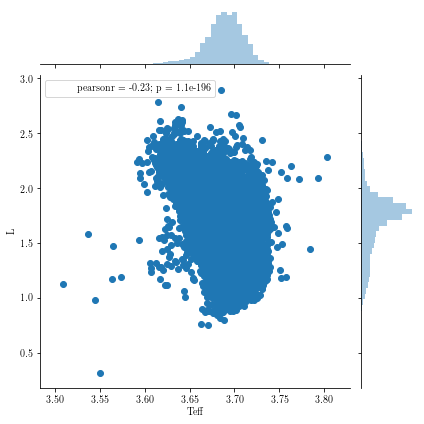

In [5]:
'''Lets plot a quick distribution of points on a HR diagram.'''
sns.jointplot(np.log10(yu18.Teff), np.log10(yu18.L))
plt.show()

In [6]:
'''Now lets say we want to find the K and H band magnitudes of
these stars asteroseismically.
For this, we need an inverse bolometric correction.'''
#For the bolomteric correction, we need the total metallicity Z
yu18['Z'] = Zsol * 10**yu18['[Fe/H]']

#Now we initialise the class using these values
get_bc = omnitool.bolometric_correction(yu18.Teff.values,\
                                       yu18.logg.values,\
                                       yu18.L.values,\
                                       yu18.Z.values)

In [7]:
'''We now want to calculate the bolometric correction for
these stars in the K, H and J bands'''
KsBC = get_bc(band='Ks')
HBC = get_bc(band='H')
JBC = get_bc(band='J')

100%|██████████| 16094/16094 [00:09<00:00, 1766.44it/s]


In [8]:
'''Using this value & the bolometric magnitude we can make the inverse bolometric 
correction'''
MKs_ast = yu18.Mbol.values - KsBC
MH_ast = yu18.Mbol.values - HBC
MJ_ast = yu18.Mbol.values - JBC

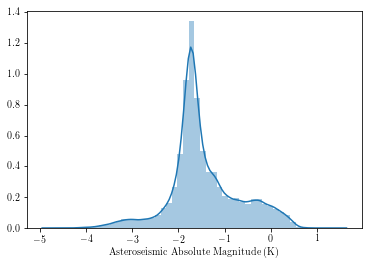

Median in K: -1.6353740088095476


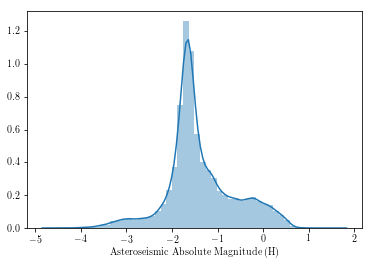

Median in H: -1.5612212010660618


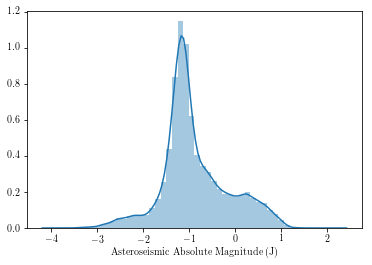

Median in J: -1.055250347987501


In [9]:
'''Lets plot a distribution of the results...'''
sns.distplot(MKs_ast)
plt.xlabel('Asteroseismic Absolute Magnitude (K)')
plt.show()
print('Median in K: '+str(np.median(MKs_ast)))

sns.distplot(MH_ast)
plt.xlabel('Asteroseismic Absolute Magnitude (H)')
plt.show()
print('Median in H: '+str(np.median(MH_ast)))

sns.distplot(MJ_ast)
plt.xlabel('Asteroseismic Absolute Magnitude (J)')
plt.show()
print('Median in J: '+str(np.median(MJ_ast)))
